In [153]:
import math
import numpy as np
import random
pi = math.pi
import pandas as pd
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.ion()
#from matplotlib.legend_handler import LandlerTuple
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import signal
import re

mpl.rcdefaults()
mpl.style.use('default')

# Comment tLis to not Lave latex plots

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


In [154]:
# pi+ z dependence HERMES 9066
df9066 = pd.read_csv('HERMESdata/9066.csv',sep=',', decimal = '.')

NN = 6
Q2_z_pp = df9066['Q2'][0:NN].mean()
x_z_pp = df9066['x'][0:NN].mean()
y_z_pp = df9066['y'][0:NN].mean()
meas_zp_z = df9066['z']
meas_zp_value = df9066['value']
meas_zp_dvalue = np.sqrt( df9066['stat_err_u']**2+ df9066['stat_err_u']**2 )
print(Q2_z_pp)
print(x_z_pp)
print(y_z_pp)


2.445
0.09699999999999999
0.535


In [155]:
# pi+ x dependence HERMES 9055
df9055 = pd.read_csv('HERMESdata/9055.csv',sep=',', decimal = '.')

cut = 1
Q2_x_pp = df9055['Q2'][cut:].mean()
z_x_pp = df9055['z'][cut:].mean()
y_x_pp = df9055['y'][cut:].mean()
meas_xp_x = df9055['x']
meas_xp_value = df9055['value']
meas_xp_dvalue = np.sqrt(df9055['stat_err_u']**2+ df9055['stat_err_u']**2 )
print(Q2_x_pp)
print(z_x_pp)
print(y_x_pp)


3.0383333333333336
0.3715
0.48899999999999993


In [156]:
# pi- z dependence HERMES 10032
df10032 = pd.read_csv('HERMESdata/10032.csv',sep=',', decimal = '.')

NN = 6
Q2_z_pm = df10032['Q2'][0:NN].mean()
x_z_pm = df10032['x'][0:NN].mean()
y_z_pm = df10032['y'][0:NN].mean()
meas_zm_z = df10032['z']
meas_zm_value = df10032['value']
meas_zm_dvalue = np.sqrt(df10032['stat_err_u']**2+ df10032['stat_err_u']**2 )
print(Q2_z_pm)
print(x_z_pm)
print(y_z_pm)

2.36
0.09366666666666666
0.5368333333333334


In [157]:
# pi- x dependence HERMES 10021
df10021 = pd.read_csv('HERMESdata/10021.csv',sep=',', decimal = '.')
cut = 1
Q2_x_pm = df10021['Q2'][cut:].mean()
z_x_pm = df10021['z'][cut:].mean()
y_x_pm = df10021['y'][cut:].mean()
meas_xm_x = df10021['x']
meas_xm_value = df10021['value']
meas_xm_dvalue = np.sqrt( df10021['stat_err_u']**2 + df10021['stat_err_u']**2 )
print(Q2_x_pm)
print(z_x_pm)
print(y_x_pm)

3.0216666666666665
0.36283333333333334
0.4876666666666667


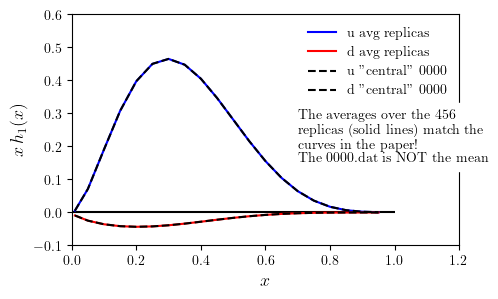

In [158]:
df = pd.read_csv('out/h1_test_my0000.txt',header=None,sep=' ', decimal = '.')
x = df[0]
h1u = df[1]
h1d = df[2]

xs = list()
h1us = list()
h1ds = list()

for k in range(1,456):
    name = 'out/h1_test' + str(k) + '.txt'
    df_temp = pd.read_csv(name,header=None,sep=' ', decimal = '.')
    xs.append( df_temp[0] )
    h1us.append( df_temp[1] )
    h1ds.append( df_temp[2] )

xs = sum(xs)/len(xs)
avg_h1u = sum(h1us)/len(h1us)
avg_h1d = sum(h1ds)/len(h1ds)


w = 5
h = 3

fs = 13
save = True


plt.figure(figsize=(w,h))
plt.hlines(0, 0, 1., color='k')
plt.plot(xs,xs*avg_h1u, color='b', label='u avg replicas')
plt.plot(xs,xs*avg_h1d, color='r', label='d avg replicas')
plt.plot(x,x*h1u,  color='k', label='u "central" 0000',linestyle = 'dashed')
plt.plot(x,x*h1d,  color='k',label='d "central" 0000',linestyle = 'dashed')


plt.xlim(0,1.2)
plt.ylim(-0.1,0.6)
plt.legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
plt.xlabel("$x$",fontsize=fs)
plt.ylabel("$x\\,h_1(x)$",fontsize=fs)
plt.text(0.7,0.15,"The averages over the 456\n replicas (solid lines) match the\n curves in the paper!\n The 0000.dat is NOT the mean",backgroundcolor='w')

plt.show()
# Htu = Htdb = Ht fav
# Htub = Htd = Ht unfav

In [159]:
#h1ds = list()
#h1us = list()
#
#for k in range(1,456):
#    name = 'LHAPDF_tables/JAM22-transversity_proton_lo/JAM22-transversity_proton_lo_' + str(k).zfill(4) + '.dat'
#    df_temp = pd.read_csv(name,skiprows=6, header=None,sep=' ', decimal = '.',skipfooter=1, engine='python')
#
#    h1ds.append( df_temp[0].dropna())
#    h1us.append( df_temp[1].dropna())
#
#d_replica0000 = sum(h1ds)/len(h1ds)
#u_replica0000 = sum(h1us)/len(h1us)
#
#with open("my0000.txt", "w") as f:
#    for l in range(0,len(d_replica0000)):
#         f.write("{:e}".format(d_replica0000[l]) + " " + "{:e}".format(u_replica0000[l]) + "\n")
#
##np.savetxt("d_replica0000.txt",d_replica0000,delimiter=",")
##np.savetxt("u_replica0000.txt",u_replica0000,delimiter=",")
#

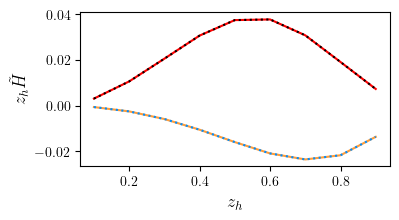

In [160]:
df = pd.read_csv('out/Ht_test.txt',header=None,sep=' ', decimal = '.')
z = df[0]
Htu = df[1]
Htub = df[2]
Htd = df[3]
Htdb = df[4]

w = 4
h = 2

fs = 13
save = True


plt.figure(figsize=(w,h))
plt.plot(z,z*Htu, label='$H_T^{u}$', color='#ff9d3a')
plt.plot(z,z*Htub, label='$H_T^{u}$', color='r')
plt.plot(z,z*Htd, label='$H_T^{d}$', color='k', linestyle='dotted')
plt.plot(z,z*Htdb, label='$H_T^{d}$', color='#008dff',linestyle='dotted')
plt.xlabel("$z_h$",fontsize=fs)
plt.ylabel("$z_h \\tilde{H}$",fontsize=fs)

plt.show()
# Htu = Htdb = Ht fav
# Htub = Htd = Ht unfav

In [161]:
dfxp = pd.read_csv('out/AUTx_LO_pp.txt',header=None,sep=' ', decimal = '.')
dfxm = pd.read_csv('out/AUTx_LO_pm.txt',header=None,sep=' ', decimal = '.')
dfzp = pd.read_csv('out/AUTz_LO_pp.txt',header=None,sep=' ', decimal = '.')
dfzm = pd.read_csv('out/AUTz_LO_pm.txt',header=None,sep=' ', decimal = '.')


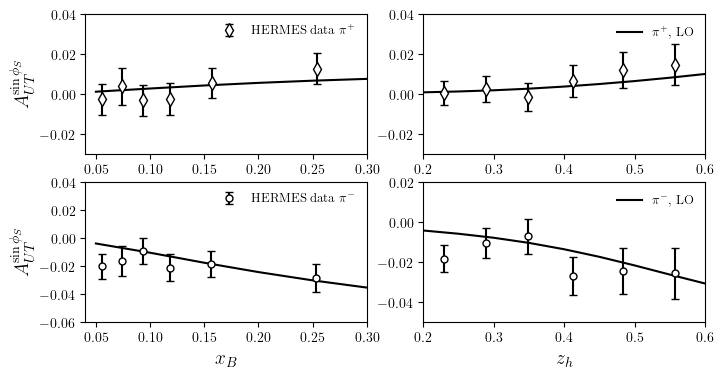

In [162]:
fs = 12
w = 8
h = 4



fig, axs = plt.subplots(2,2, figsize= (w,h), sharey = False)

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'

# First plot: A_UT vs xB at fixed zh

axs[0,0].plot(dfxp[0], dfxp[1], color="k")
axs[0,0].errorbar(meas_xp_x,meas_xp_value,meas_xp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3, label='HERMES data $\\pi^+$')
axs[1,0].plot(dfxm[0], dfxm[1], color="k")
axs[1,0].errorbar(meas_xm_x,meas_xm_value,meas_xm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3,label='HERMES data $\\pi^-$')

axs[0,0].set_xlabel('$x_B$', fontsize=14)
axs[0,0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)
axs[1,0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)

axs[0,0].tick_params(axis='both', which='minor', labelsize=12)       
axs[1,0].tick_params(axis='both', which='minor', labelsize=12)  
# Second plot: A_UT vs zh at fixed xB
axs[0,1].plot(dfzp[0], dfzp[1], color="k",label='$\\pi^+$, LO')
axs[0,1].errorbar(meas_zp_z,meas_zp_value,meas_zp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3)
axs[1,1].plot(dfzm[0], dfzm[1], color="k",label='$\\pi^-$, LO')
axs[1,1].errorbar(meas_zm_z,meas_zm_value,meas_zm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3)

axs[0,0].set_xlim(0.04 ,0.3)
axs[0,0].set_ylim(-0.03,0.04)
axs[1,0].set_xlim(0.04 ,0.3)
axs[1,0].set_ylim(-0.06,0.04)
axs[0,1].set_xlim(0.2 ,.6)
axs[0,1].set_ylim(-0.03,0.04)
axs[1,1].set_xlim(0.2 ,.6)
axs[1,1].set_ylim(-0.05,0.02)
axs[1,1].set_xlabel('$z_h$', fontsize=14)

axs[1,0].set_xlabel('$x_B$', fontsize=14)
#axs[1].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)

axs[0,1].tick_params(axis='both', which='minor', labelsize=12)  
axs[1,1].tick_params(axis='both', which='minor', labelsize=12)  

#axs[0].text(0.05,0.008,tl1)
#axs[1].text(0.05,0.008,tl2)

axs[0,0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[1,0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[0,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[1,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)

plt.savefig('./out/A_UT_LO.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [163]:

dfxpNLO= list()
dfxmNLO= list()
dfzpNLO= list()
dfzmNLO= list()

N_scenario = 10
for k in range(1,N_scenario):

    fnamexp = 'out/run'+str(k)+'/AUTx_NLO_pp.txt'
    fnamexm = 'out/run'+str(k)+'/AUTx_NLO_pm.txt'
    fnamezp = 'out/run'+str(k)+'/AUTz_NLO_pp.txt'
    fnamezm = 'out/run'+str(k)+'/AUTz_NLO_pm.txt'

    dfxpNLO.append(pd.read_csv(fnamexp,header=None,sep=' ', decimal = '.'))
    dfxmNLO.append(pd.read_csv(fnamexm,header=None,sep=' ', decimal = '.'))
    dfzpNLO.append(pd.read_csv(fnamezp,header=None,sep=' ', decimal = '.'))
    dfzmNLO.append(pd.read_csv(fnamezm,header=None,sep=' ', decimal = '.'))
    
cm_red = plt.get_cmap('autumn',N_scenario)
cm_blue = plt.get_cmap('winter',N_scenario)



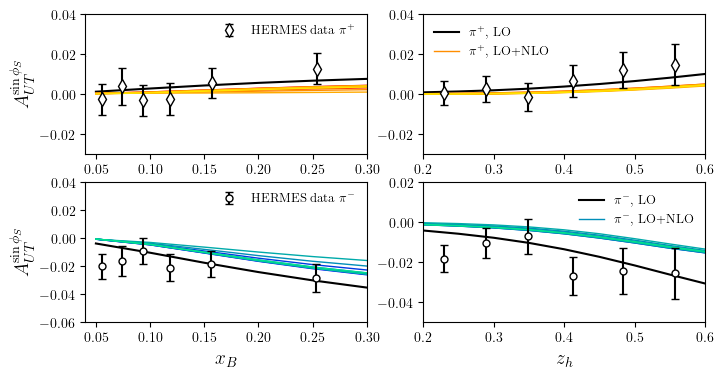

In [164]:
fs = 12
w = 8
h = 4



fig, axs = plt.subplots(2,2, figsize= (w,h), sharey = False)

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'

# First plot: A_UT vs xB at fixed zh

axs[0,0].plot(dfxp[0], dfxp[1], color="k")
for k in range(0,N_scenario-1):
    axs[0,0].plot(dfxpNLO[k][0], dfxpNLO[k][1], color =cm_red(k/N_scenario),linestyle='solid',linewidth=1)
axs[0,0].errorbar(meas_xp_x,meas_xp_value,meas_xp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3, label='HERMES data $\\pi^+$')
axs[1,0].plot(dfxm[0], dfxm[1], color="k")
for k in range(0,N_scenario -1):
    axs[1,0].plot(dfxmNLO[k][0], dfxmNLO[k][1], color =cm_blue(k/N_scenario) ,linestyle='solid',linewidth=1)
axs[1,0].errorbar(meas_xm_x,meas_xm_value,meas_xm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3,label='HERMES data $\\pi^-$')

axs[0,0].set_xlabel('$x_B$', fontsize=14)
axs[0,0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)
axs[1,0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)

axs[0,0].tick_params(axis='both', which='minor', labelsize=12)       
axs[1,0].tick_params(axis='both', which='minor', labelsize=12)  
# Second plot: A_UT vs zh at fixed xB
axs[0,1].plot(dfzp[0], dfzp[1], color="k",label='$\\pi^+$, LO')
axs[0,1].plot(dfzpNLO[0][0], dfzpNLO[0][1], color =cm_red(.5) ,linestyle='solid',label='$\\pi^+$, LO+NLO',linewidth=1)
for k in range(1,N_scenario-1):
    axs[0,1].plot(dfzpNLO[k][0], dfzpNLO[k][1], color =cm_red(k/N_scenario) ,linestyle='solid',linewidth=1)
axs[0,1].errorbar(meas_zp_z,meas_zp_value,meas_zp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3)
axs[1,1].plot(dfzm[0], dfzm[1], color="k",label='$\\pi^-$, LO')
axs[1,1].plot(dfzmNLO[0][0], dfzmNLO[0][1], color =cm_blue(.5) ,linestyle='solid',label='$\\pi^-$, LO+NLO',linewidth=1)
for k in range(1,N_scenario-1):
    axs[1,1].plot(dfzmNLO[k][0], dfzmNLO[k][1], color =cm_blue(k/N_scenario) ,linestyle='solid',linewidth=1)
axs[1,1].errorbar(meas_zm_z,meas_zm_value,meas_zm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3)

axs[0,0].set_xlim(0.04 ,0.3)
axs[0,0].set_ylim(-0.03,0.04)
axs[1,0].set_xlim(0.04 ,0.3)
axs[1,0].set_ylim(-0.06,0.04)
axs[0,1].set_xlim(0.2 ,.6)
axs[0,1].set_ylim(-0.03,0.04)
axs[1,1].set_xlim(0.2 ,.6)
axs[1,1].set_ylim(-0.05,0.02)
axs[1,1].set_xlabel('$z_h$', fontsize=14)

axs[1,0].set_xlabel('$x_B$', fontsize=14)
#axs[1].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)

axs[0,1].tick_params(axis='both', which='minor', labelsize=12)  
axs[1,1].tick_params(axis='both', which='minor', labelsize=12)  

#axs[0].text(0.05,0.008,tl1)
#axs[1].text(0.05,0.008,tl2)

axs[0,0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[1,0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[0,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[1,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
    
plt.savefig('./out/A_UT_NLO.pdf', dpi=300, bbox_inches='tight')
plt.show() 